In [2]:
import numpy as np
import xarray as xr
import time 
import os
from netCDF4 import Dataset
from pyproj import CRS
import rasterio
import rioxarray
from rasterio.enums import Resampling
from sklearn.preprocessing import StandardScaler
import rioxarray

In [24]:
filename_biostates_2019 = '/cluster/projects/itk-SINMOD/coral-mapping/midnor/BioStates_2019.nc'
biostates_2019 = xr.open_dataset(filename_biostates_2019)

In [10]:
filename_biostates_2022 = '/cluster/projects/itk-SINMOD/coral-mapping/midnor/BioStates_2022.nc'
biostates_2022 = xr.open_dataset(filename_biostates_2022)

In [4]:
filename_biostates_2023 = '/cluster/projects/itk-SINMOD/coral-mapping/midnor/BioStates_2023.nc'
biostates_2023 = xr.open_dataset(filename_biostates_2023)

In [5]:
print(list(biostates_2023.variables))

['time', 'grid_mapping', 'LayerDepths', 'xc', 'yc', 'zc', 'depth', 'DXxDYy', 'nitrate', 'silicate', 'ammonium', 'diatoms', 'flagellates', 'ciliates', 'HNANO', 'bacteria', 'calanus_finmarchicus', 'calanus_glacialis', 'detritus_slow', 'detritus_fast', 'DOC', 'cDOM', 'silicate_detritus', 'sediment_Si', 'sediment_N']


In [9]:
diatoms_2019 = biostates_2019['diatoms']
valid_mask = ~diatoms_2019.isnull()  
top_layer_idx = valid_mask.argmax(dim="zc")
no_valid_data_mask = valid_mask.sum(dim="zc") == 0
diatoms_top_layer_2019 = diatoms_2019.isel(zc=top_layer_idx)
diatoms_top_layer_2019 = diatoms_top_layer_2019.where(~no_valid_data_mask, np.nan)

In [11]:
diatoms_top_layer_2019.to_netcdf('/cluster/home/maikents/surface_chlorophyll/diatoms_2019.nc')

In [14]:
diatoms_2022 = biostates_2022['diatoms']
valid_mask = ~diatoms_2022.isnull()  
top_layer_idx = valid_mask.argmax(dim="zc")
no_valid_data_mask = valid_mask.sum(dim="zc") == 0
diatoms_top_layer_2022 = diatoms_2022.isel(zc=top_layer_idx)
diatoms_top_layer_2022 = diatoms_top_layer_2022.where(~no_valid_data_mask, np.nan)

In [15]:
diatoms_top_layer_2022.to_netcdf('/cluster/home/maikents/surface_chlorophyll/diatoms_2022.nc')

In [ ]:
diatoms_2023 = biostates_2023['diatoms']
valid_mask = ~diatoms_2023.isnull()  
top_layer_idx = valid_mask.argmax(dim="zc")
no_valid_data_mask = valid_mask.sum(dim="zc") == 0
diatoms_top_layer_2023 = diatoms_2023.isel(zc=top_layer_idx)
diatoms_top_layer_2023 = diatoms_top_layer_2023.where(~no_valid_data_mask, np.nan)

In [ ]:
diatoms_top_layer_2023.to_netcdf('/cluster/home/maikents/surface_chlorophyll/diatoms_2023.nc')

In [7]:
flagellates_2019 = biostates_2019['flagellates']
valid_mask = ~flagellates_2019.isnull()  
top_layer_idx = valid_mask.argmax(dim="zc")
no_valid_data_mask = valid_mask.sum(dim="zc") == 0
flagellates_top_layer_2019 = flagellates_2019.isel(zc=top_layer_idx)
flagellates_top_layer_2019 = flagellates_top_layer_2019.where(~no_valid_data_mask, np.nan)

In [8]:
flagellates_top_layer_2019.to_netcdf('/cluster/home/maikents/surface_chlorophyll/flagellates_2019.nc')

In [11]:
flagellates_2022 = biostates_2022['flagellates']
valid_mask = ~flagellates_2022.isnull()  
top_layer_idx = valid_mask.argmax(dim="zc")
no_valid_data_mask = valid_mask.sum(dim="zc") == 0
flagellates_top_layer_2022 = flagellates_2022.isel(zc=top_layer_idx)
flagellates_top_layer_2022 = flagellates_top_layer_2022.where(~no_valid_data_mask, np.nan)

In [12]:
flagellates_top_layer_2022.to_netcdf('/cluster/home/maikents/surface_chlorophyll/flagellates_2022.nc')

In [ ]:
flagellates_2023 = biostates_2023['flagellates']
valid_mask = ~flagellates_2023.isnull()  
top_layer_idx = valid_mask.argmax(dim="zc")
no_valid_data_mask = valid_mask.sum(dim="zc") == 0
flagellates_top_layer_2023 = flagellates_2023.isel(zc=top_layer_idx)
flagellates_top_layer_2023 = flagellates_top_layer_2023.where(~no_valid_data_mask, np.nan)

In [ ]:
flagellates_top_layer_2023.to_netcdf('/cluster/home/maikents/surface_chlorophyll/flagellates_2023.nc')

In [13]:
diatoms_top_layer_2022 = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/diatoms_2022.nc')
diatoms_top_layer_2019 = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/diatoms_2019.nc')


In [16]:
diatoms_top_layer_2022 = diatoms_top_layer_2022.isel(time=slice(0, 365))

In [18]:
diatoms_top_layer = xr.concat([diatoms_top_layer_2019, diatoms_top_layer_2022], dim="time")


diatoms_top_layer.to_netcdf('/cluster/home/maikents/surface_chlorophyll/diatoms_2019_2022.nc')

In [19]:
flagellates_top_layer_2022 = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/flagellates_2022.nc')
flagellates_top_layer_2019 = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/flagellates_2019.nc')


In [20]:
flagellates_top_layer_2022 = flagellates_top_layer_2022.isel(time=slice(0, 365))

In [21]:
flagellates_top_layer = xr.concat([flagellates_top_layer_2019, flagellates_top_layer_2022], dim="time")


flagellates_top_layer.to_netcdf('/cluster/home/maikents/surface_chlorophyll/flagellates_2019_2022.nc')

In [13]:
diatoms = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/diatoms_2019_2022.nc')
flagellates = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/flagellates_2019_2022.nc')

In [14]:
diatoms_top_layer = diatoms['diatoms']
flagellates_top_layer = flagellates['flagellates']

print(diatoms_top_layer.shape)
print(flagellates_top_layer.shape)

(730, 555, 950)
(730, 555, 950)


In [15]:
mmolN2gC = 7.6 * 12 * 0.001  
Chl_C_D = 0.035 
Chl_C_F = 0.013  

#surface chlorophyll
chl_mg_2019_2022 = 1e3 * mmolN2gC * (Chl_C_D * diatoms_top_layer + Chl_C_F * flagellates_top_layer)

chl_mg_2019_2022_da = xr.DataArray(
    chl_mg_2019_2022,
    coords={"time": diatoms["time"], "yc": diatoms["yc"], "xc": diatoms["xc"]},
    dims=["time", "yc", "xc"],
)

print(chl_mg_2019_2022_da)


<xarray.DataArray (time: 730, yc: 555, xc: 950)> Size: 2GB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.18766582, 0.18766582, 0.18766582, ..., 0.19163187,
         0.19163187, 0.19163187],
        [0.18766582, 0.18766582, 0.18766582, ..., 0.19163187,
         0.19163187, 0.19163187],
        [0.18766582, 0.18766582, 0.18766582, ..., 0.19163187,
         0.19163187, 0.19163187]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.2080528 , 0.2080528 , 0.2080528 , ..., 0.174932

In [16]:
chl_ds = xr.Dataset(
    {
        "chl_mg": chl_mg_2019_2022_da
    }
)
print(chl_ds)

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 730, yc: 555, xc: 950)
Coordinates:
  * time     (time) int64 6kB 0 1 2 3 4 5 6 7 ... 723 724 725 726 727 728 729
  * yc       (yc) float32 2kB 800.0 1.6e+03 2.4e+03 ... 4.432e+05 4.44e+05
  * xc       (xc) float32 4kB 800.0 1.6e+03 2.4e+03 ... 7.592e+05 7.6e+05
Data variables:
    chl_mg   (time, yc, xc) float32 2GB nan nan nan nan ... 0.1749 0.1749 0.1749


In [17]:
chl_ds.to_netcdf('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022.nc')

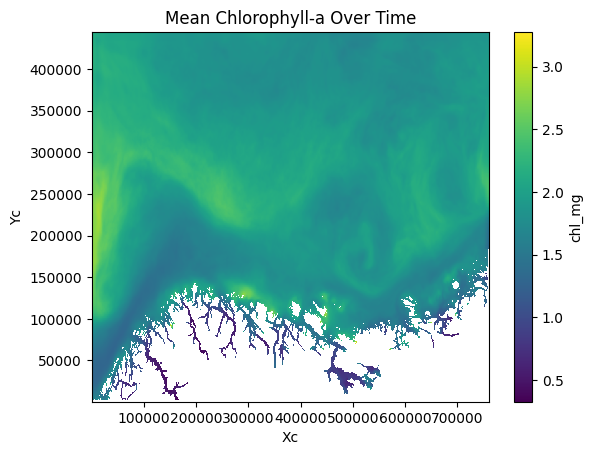

In [19]:
import matplotlib.pyplot as plt

chl_mean = chl_ds['chl_mg'].mean(dim='time')

chl_mean.plot()

plt.title('Mean Chlorophyll-a Over Time')
plt.xlabel('Xc')  
plt.ylabel('Yc')  
plt.show()


In [20]:
#Create min, mean and max features across time

data_var = chl_ds['chl_mg']
time_avg_top_layer = data_var.mean(dim="time", skipna=True)
time_percentiles = data_var.quantile([0.1, 0.9], dim="time", skipna=True)

stats_array = xr.concat(
    [time_avg_top_layer, time_percentiles.sel(quantile=0.1).drop_vars("quantile"), 
     time_percentiles.sel(quantile=0.9).drop_vars("quantile")],
    dim="stat"
).rename(f"chlor_a_features")
stats_array = stats_array.assign_coords(stat=["mean", "10th_percentile", "90th_percentile"])

stats_array.to_netcdf('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features.nc', mode='w')

/cluster/home/maikents/PyEnvCoralMapping/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


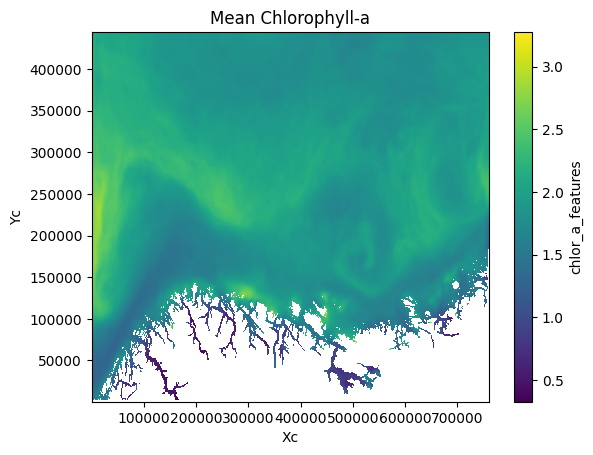

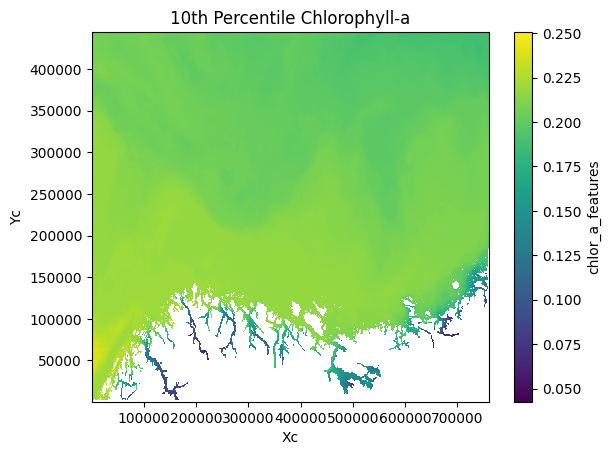

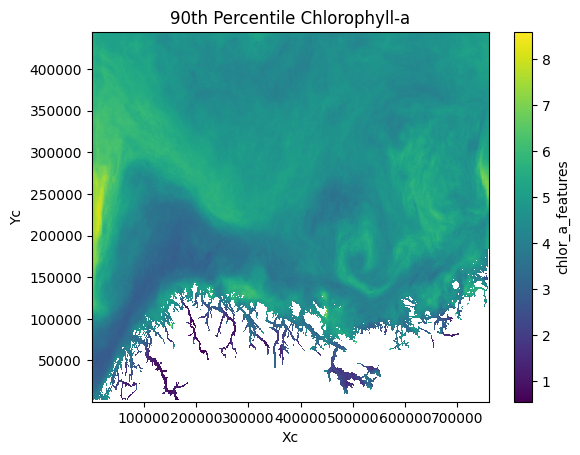

In [21]:
import matplotlib.pyplot as plt


stats_array.isel(stat=0).plot()
plt.title('Mean Chlorophyll-a')
plt.xlabel('Xc') 
plt.ylabel('Yc') 
plt.show()

stats_array.isel(stat=1).plot()
plt.title('10th Percentile Chlorophyll-a')
plt.xlabel('Xc') 
plt.ylabel('Yc')   
plt.show()

stats_array.isel(stat=2).plot()
plt.title('90th Percentile Chlorophyll-a')
plt.xlabel('Xc')  
plt.ylabel('Yc')  
plt.show()


In [57]:
chlor_a_sinmod = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features.nc')

In [58]:
def obtain_sinmod_crs(PhysStates_data):
    grid_mapping = PhysStates_data['grid_mapping']  #Replace 'grid_mapping' with the correct variable name if different
    grid_attrs = grid_mapping.attrs  

    #Print horizontal resolution if available
    horizontal_resolution = grid_attrs.get('horizontal_resolution', 'unknown')
    print(f"\nHorizontal resolution: {horizontal_resolution} meters")

    #Construct the CRS using the attributes
    crs_sinmod = CRS.from_proj4(
        f"+proj=stere "
        f"+lat_0={grid_attrs['latitude_of_projection_origin']} "
        f"+lat_ts={grid_attrs['standard_parallel']} "
        f"+lon_0={grid_attrs['straight_vertical_longitude_from_pole']} "
        f"+x_0={grid_attrs['false_easting']} "
        f"+y_0={grid_attrs['false_northing']} "
        f"+a={grid_attrs['semi_major_axis']} "
        f"+b={grid_attrs['semi_minor_axis']} "
        f"+units=m +no_defs"
    )

    print(f"\nSINMOD CRS: {crs_sinmod}")
    return crs_sinmod

midnor_crs = obtain_sinmod_crs(biostates_2019)



Horizontal resolution: 800.0 meters

SINMOD CRS: +proj=stere +lat_0=90.0 +lat_ts=60.0 +lon_0=58.0 +x_0=2544800.0 +y_0=1918800.0 +a=6370000.0 +b=6370000.0 +units=m +no_defs +type=crs


In [59]:
#Attach the crs to the SINMOD dataset
chlor_a_sinmod = chlor_a_sinmod.rio.write_crs(midnor_crs)

In [60]:
print(chlor_a_sinmod)

<xarray.Dataset> Size: 6MB
Dimensions:           (yc: 555, xc: 950, stat: 3)
Coordinates:
  * yc                (yc) float32 2kB 800.0 1.6e+03 ... 4.432e+05 4.44e+05
  * xc                (xc) float32 4kB 800.0 1.6e+03 ... 7.592e+05 7.6e+05
  * stat              (stat) <U15 180B 'mean' ... '90th_percentile'
    spatial_ref       int64 8B 0
Data variables:
    chlor_a_features  (stat, yc, xc) float32 6MB ...


In [61]:

chlor_a_sinmod_1 = xr.Dataset({
    'chlor_a_features': chlor_a_sinmod["chlor_a_features"],
})


In [62]:
print(chlor_a_sinmod_1)

<xarray.Dataset> Size: 6MB
Dimensions:           (yc: 555, xc: 950, stat: 3)
Coordinates:
  * yc                (yc) float32 2kB 800.0 1.6e+03 ... 4.432e+05 4.44e+05
  * xc                (xc) float32 4kB 800.0 1.6e+03 ... 7.592e+05 7.6e+05
  * stat              (stat) <U15 180B 'mean' ... '90th_percentile'
    spatial_ref       int64 8B 0
Data variables:
    chlor_a_features  (stat, yc, xc) float32 6MB ...


In [63]:
#4: Align the SINMOD data with the bathymetry

tif_file = '/cluster/projects/itk-SINMOD/coral-mapping/data/raw_data/EMOD-tifs/bathymetry_32N_Clip_sample.tif'

def align_SINMOD_and_bathymetry(SINMOD_features, tif_file, resampling=Resampling.bilinear):
        
    with rioxarray.open_rasterio(tif_file) as tif:

        if 'band' in tif.dims:
            tif = tif.isel(band=0)

        SINMOD_features_reprojected = SINMOD_features.rio.reproject_match(tif, resampling=resampling)

        print(SINMOD_features_reprojected.rio.bounds())

        
        sinmod_mask = SINMOD_features_reprojected['chlor_a_features'][0].isnull()

        #Apply the mask to the EMOD data
        tif = tif.where(~sinmod_mask, np.nan)

        valid_mask = SINMOD_features_reprojected['chlor_a_features'][0].notnull()

        valid_columns = valid_mask.any(dim="y")  
        min_col = valid_columns.argmax().item()  #First non-NaN column from the left
        max_col = valid_columns.shape[0] - valid_columns[::-1].argmax().item() - 1  #First non-NaN column from the right

        #Find the first valid row (non-NaN) from the top (min row index)
        valid_rows = valid_mask.any(dim="x")  #Check for valid values in each row
        min_row = valid_rows.argmax().item()  #First non-NaN row from the top
        max_row = valid_rows.shape[0] - valid_rows[::-1].argmax().item() - 1  #Adjust for reverse indexing

        #Slice the raster to the bounding box of valid data
        clipped_SINMOD_features = SINMOD_features_reprojected.isel(x=slice(min_col, max_col + 1), y=slice(min_row, max_row + 1))
        
        clipped_tif = tif.rio.clip_box(minx=clipped_SINMOD_features.rio.bounds()[0]+1, 
                                        miny=clipped_SINMOD_features.rio.bounds()[1], 
                                        maxx=clipped_SINMOD_features.rio.bounds()[2], 
                                        maxy=clipped_SINMOD_features.rio.bounds()[3])
        
        clipped_tif = clipped_tif.reset_coords(drop=True)

    return clipped_SINMOD_features, clipped_tif

chlor_a_features_reprojected, tif = align_SINMOD_and_bathymetry(chlor_a_sinmod_1 , tif_file)

(-148857.58868623473, 6580002.847672726, 866884.4113137652, 7621679.847672726)


In [64]:
print(list(chlor_a_features_reprojected.variables))
print(type(chlor_a_features_reprojected))

['stat', 'spatial_ref', 'x', 'y', 'chlor_a_features']
<class 'xarray.core.dataset.Dataset'>


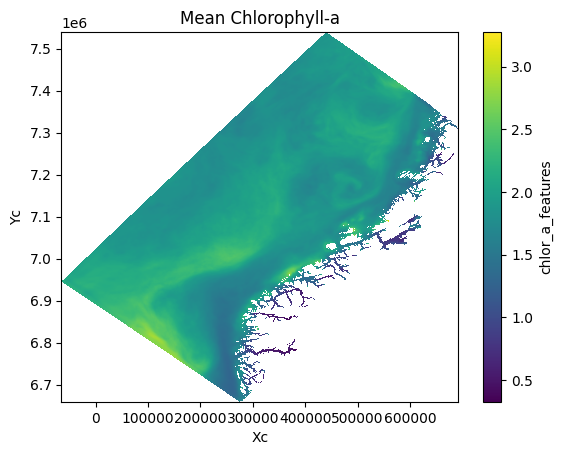

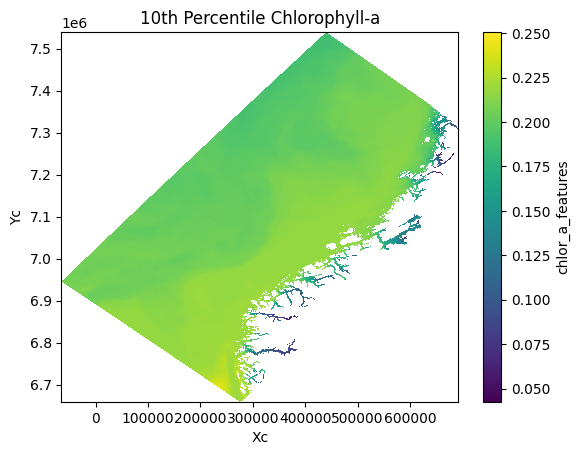

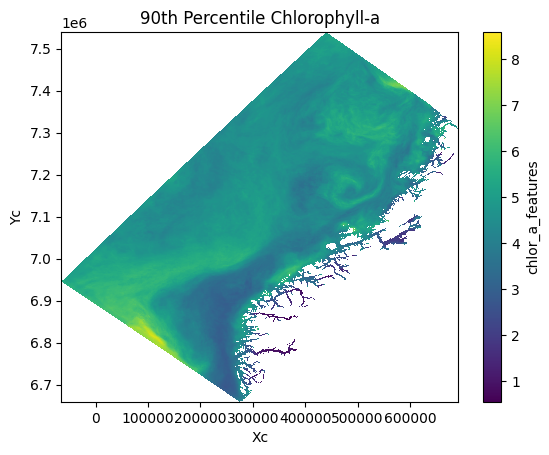

In [65]:
import matplotlib.pyplot as plt


chlor_a_features_reprojected['chlor_a_features'].isel(stat=0).plot()
plt.title('Mean Chlorophyll-a')
plt.xlabel('Xc') 
plt.ylabel('Yc') 
plt.show()

chlor_a_features_reprojected['chlor_a_features'].isel(stat=1).plot()
plt.title('10th Percentile Chlorophyll-a')
plt.xlabel('Xc') 
plt.ylabel('Yc')   
plt.show()

chlor_a_features_reprojected['chlor_a_features'].isel(stat=2).plot()
plt.title('90th Percentile Chlorophyll-a')
plt.xlabel('Xc')  
plt.ylabel('Yc')  
plt.show()


In [66]:
chlor_a_features_reprojected.to_netcdf('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features_emod_grid.nc')

In [2]:
chlor_a_features_reprojected = xr.open_dataset('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features_emod_grid.nc')

In [32]:
#Standardize

chlor_a_mean = chlor_a_features_reprojected['chlor_a_features'].isel(stat=0)
chlor_a_min = chlor_a_features_reprojected['chlor_a_features'].isel(stat=1)
chlor_a_max = chlor_a_features_reprojected['chlor_a_features'].isel(stat=2)

In [33]:
#Mean 

chlor_data_mean = chlor_a_mean.astype(np.float32)  
chlor_data_mean_scaled = np.copy(chlor_data_mean)    

reshaped_chlor_data_mean = chlor_data_mean.values.reshape(chlor_data_mean.shape[0], -1)  

mask = np.isnan(reshaped_chlor_data_mean)

chlor_a_scaler = StandardScaler()
for i in range(reshaped_chlor_data_mean.shape[1]):  
    column = reshaped_chlor_data_mean[:, i] 
    if not np.all(np.isnan(column)):  
        reshaped_chlor_data_mean[:, i][~mask[:, i]] = chlor_a_scaler.fit_transform(column[~mask[:, i]].reshape(-1, 1)).ravel()


reshaped_chlor_data_mean_scaled = reshaped_chlor_data_mean.reshape(chlor_data_mean.shape)

chlor_data_mean_standardized = xr.DataArray(reshaped_chlor_data_mean_scaled, dims=chlor_a_mean.dims, attrs=chlor_a_mean.attrs)

print(f"Standardised Chlor a mean - Mean: {chlor_data_mean_standardized.mean():.2f}, Std Dev: {chlor_data_mean_standardized.std():.2f}")


chlor_a_standardized = chlor_a_features_reprojected.copy()

chlor_a_standardized['chlor_a_features'].data[0, :, :] = chlor_data_mean_standardized.data


Standardised Chlor a mean - Mean: -0.00, Std Dev: 1.00


In [34]:
#Min  

chlor_data_min = chlor_a_min.astype(np.float32)  
chlor_data_min_scaled = np.copy(chlor_data_min)    

reshaped_chlor_data_min = chlor_data_min.values.reshape(chlor_data_min.shape[0], -1)  

mask = np.isnan(reshaped_chlor_data_min)

chlor_a_scaler = StandardScaler()
for i in range(reshaped_chlor_data_min.shape[1]):  
    column = reshaped_chlor_data_min[:, i] 
    if not np.all(np.isnan(column)):  
        reshaped_chlor_data_min[:, i][~mask[:, i]] = chlor_a_scaler.fit_transform(column[~mask[:, i]].reshape(-1, 1)).ravel()


reshaped_chlor_data_min_scaled = reshaped_chlor_data_min.reshape(chlor_data_min.shape)

chlor_data_min_standardized = xr.DataArray(reshaped_chlor_data_min_scaled, dims=chlor_a_min.dims, attrs=chlor_a_min.attrs)

print(f"Standardised Chlor a min - Mean: {chlor_data_min_standardized.mean():.2f}, Std Dev: {chlor_data_min_standardized.std():.2f}")


chlor_a_standardized['chlor_a_features'].data[1, :, :] = chlor_data_min_standardized.data


Standardised Chlor a min - Mean: -0.00, Std Dev: 1.00


In [35]:
#Max 

chlor_data_max = chlor_a_max.astype(np.float32)  
chlor_data_max_scaled = np.copy(chlor_data_max)    

reshaped_chlor_data_max = chlor_data_max.values.reshape(chlor_data_max.shape[0], -1)  

mask = np.isnan(reshaped_chlor_data_max)

chlor_a_scaler = StandardScaler()
for i in range(reshaped_chlor_data_max.shape[1]):  
    column = reshaped_chlor_data_max[:, i] 
    if not np.all(np.isnan(column)):  
        reshaped_chlor_data_max[:, i][~mask[:, i]] = chlor_a_scaler.fit_transform(column[~mask[:, i]].reshape(-1, 1)).ravel()


reshaped_chlor_data_max_scaled = reshaped_chlor_data_max.reshape(chlor_data_max.shape)

chlor_data_max_standardized = xr.DataArray(reshaped_chlor_data_max_scaled, dims=chlor_a_max.dims, attrs=chlor_a_max.attrs)

print(f"Standardised Chlor a max - Mean: {chlor_data_max_standardized.mean():.2f}, Std Dev: {chlor_data_max_standardized.std():.2f}")


chlor_a_standardized['chlor_a_features'].data[2, :, :] = chlor_data_max_standardized.data

Standardised Chlor a max - Mean: -0.00, Std Dev: 1.00


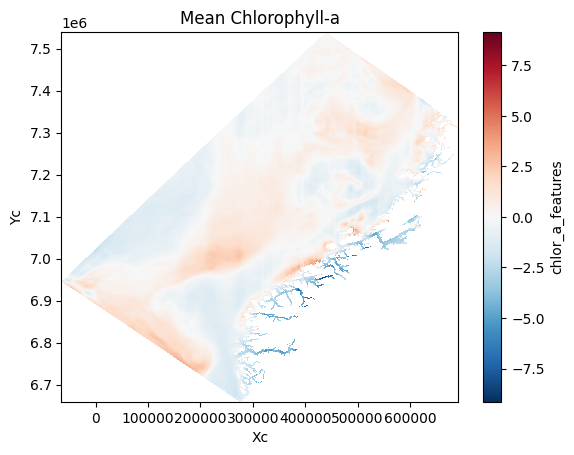

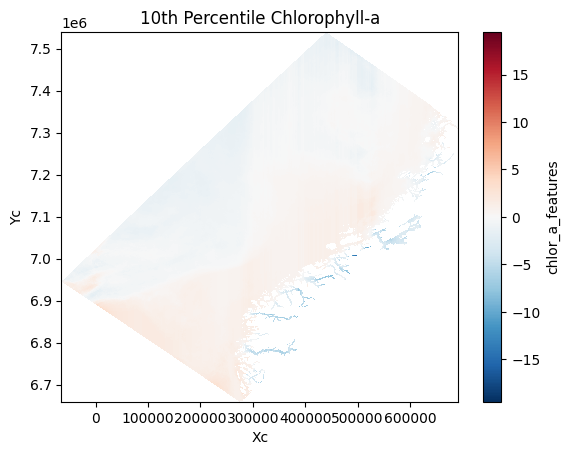

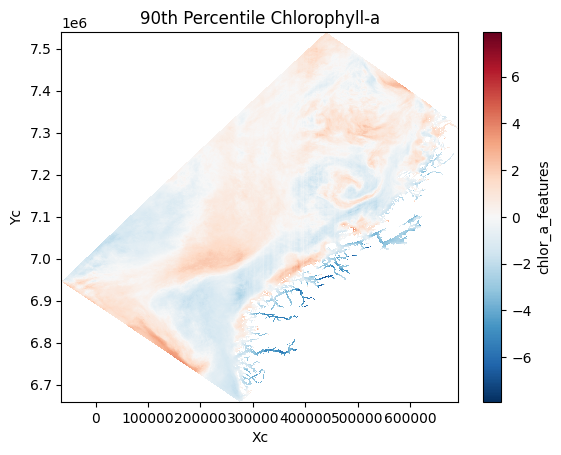

In [36]:
import matplotlib.pyplot as plt


chlor_a_standardized['chlor_a_features'].isel(stat=0).plot()
plt.title('Mean Chlorophyll-a')
plt.xlabel('Xc') 
plt.ylabel('Yc') 
plt.show()

chlor_a_standardized['chlor_a_features'].isel(stat=1).plot()
plt.title('10th Percentile Chlorophyll-a')
plt.xlabel('Xc') 
plt.ylabel('Yc')   
plt.show()

chlor_a_standardized['chlor_a_features'].isel(stat=2).plot()
plt.title('90th Percentile Chlorophyll-a')
plt.xlabel('Xc')  
plt.ylabel('Yc')  
plt.show()


In [43]:
chlor_a_standardized.to_netcdf('/cluster/home/maikents/surface_chlorophyll/surface_chlorophyll_2019_2022_features_emod_grid_standardized.nc')